In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split

#Import Data
df = pd.read_csv('./BTC1h2020.csv')

#change MTS in ms-Timeframe to UTC-Timeframe
df.insert(loc=0, column='Date', value=pd.to_datetime(df["MTS"], unit='ms'))
df = df.drop(['MTS', 'Unnamed: 0'], axis=1)

,Date,OPEN,CLOSE,HIGH,LOW,VOLUME
0,2020-01-01 00:00:00,7208.20000,7189.808851,7208.2,7185.40000,106.254414
1,2020-01-01 01:00:00,7187.50000,7227.800000,7250.0,7187.40000,61.754452
2,2020-01-01 02:00:00,7231.24716,7256.700000,7256.7,7231.24716,34.663554
3,2020-01-01 03:00:00,7256.60000,7237.300000,7256.7,7233.10000,32.383619
4,2020-01-01 04:00:00,7237.20000,7226.100000,7241.3,7226.10000,52.429609


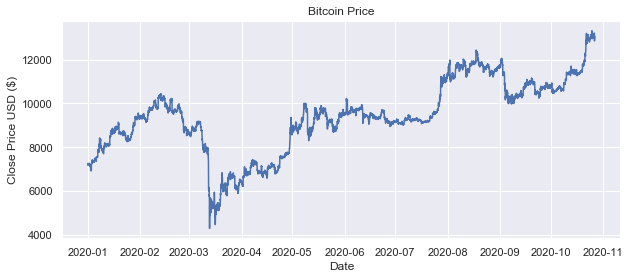

In [2]:
##preprocess##
#X-Axis is the Timeseries
X = df.iloc[:,0].values
#Y-Axis is the Closing-Price
Y = df.iloc[:,1].values

plt.figure(figsize=(10, 4))
plt.title("Bitcoin Price")
plt.xlabel("Date")
plt.ylabel("Close Price USD ($)")
plt.plot(X, Y)


#Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 1/3, random_state = 0)

#View Dataset
df.head()


In [3]:
btccloseprice = df[['CLOSE']]
futureDays = 30
print(btccloseprice.head())


         CLOSE
0  7189.808851
1  7227.800000
2  7256.700000
3  7237.300000
4  7226.100000


In [4]:
btccloseprice["Prediction"] = btccloseprice[["CLOSE"]].shift(-futureDays)
print(btccloseprice.head())
print(btccloseprice.tail())

         CLOSE  Prediction
0  7189.808851  7148.80000
1  7227.800000  7126.00000
2  7256.700000  7165.01618
3  7237.300000  7178.50000
4  7226.100000  7181.50000
             CLOSE  Prediction
7193  13012.000000         NaN
7194  13029.000000         NaN
7195  13049.901997         NaN
7196  13059.000000         NaN
7197  13094.000000         NaN


In [5]:
x = np.array(btccloseprice.drop(["Prediction"], 1))[:-futureDays]
y = np.array(btccloseprice["Prediction"])[:-futureDays]
print(y)
print(x)

[ 7148.8        7126.         7165.01618   ... 13049.9019965 13059.
 13094.       ]
[[ 7189.80885108]
 [ 7227.8       ]
 [ 7256.7       ]
 ...
 [13015.52918484]
 [13017.05831545]
 [12999.        ]]


In [6]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25)

In [7]:
# Creating the decision tree regressor model
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor().fit(xtrain, ytrain)

# creating the Linear Regression model
from sklearn.linear_model import LinearRegression
linear = LinearRegression().fit(xtrain, ytrain)

xfuture = btccloseprice.drop(["Prediction"], 1)[:-futureDays]
xfuture = xfuture.tail(futureDays)
xfuture = np.array(xfuture)
print(xfuture)

[[13004.        ]
 [13088.        ]
 [13121.16136237]
 [13095.        ]
 [13149.        ]
 [13115.        ]
 [13123.        ]
 [13109.        ]
 [13073.        ]
 [13081.        ]
 [13127.03663502]
 [13147.        ]
 [13156.69287177]
 [13141.27162866]
 [13309.        ]
 [13320.        ]
 [12976.38295233]
 [13035.        ]
 [13041.        ]
 [13036.        ]
 [13010.        ]
 [13001.        ]
 [12969.        ]
 [13000.        ]
 [13006.        ]
 [13004.        ]
 [12968.        ]
 [13015.52918484]
 [13017.05831545]
 [12999.        ]]


In [8]:
treePrediction = tree.predict(xfuture)
print("Decision Tree prediction =",treePrediction)

Decision Tree prediction = [13030.5        13029.72958405 13086.         13019.
 13037.         13057.57625183 13086.         13100.
 13110.50463855 13129.         13110.         13086.835084
 12976.87818315 13067.         13104.         13118.
 12969.         13221.         13221.         13221.
 12993.28719228 12855.0569569  12880.91010121 12855.0569569
 13010.         13030.5        13029.         13049.9019965
 13059.         13005.        ]


In [9]:
linearPrediction = linear.predict(xfuture)
print("Linear regression Prediction =",linearPrediction)

Linear regression Prediction = [12978.76710235 13061.64219522 13094.35946886 13068.54845296
 13121.82529838 13088.28061793 13096.17348391 13082.36096844
 13046.84307149 13054.73593748 13100.15606132 13119.85208188
 13129.41514912 13114.20042346 13279.68261813 13290.53530886
 12951.51989532 13009.35195805 13015.27160754 13010.3385663
 12984.68675184 12975.8072776  12944.23581365 12974.82066935
 12980.74031884 12978.76710235 12943.2492054  12990.14189121
 12991.65054408 12973.8340611 ]


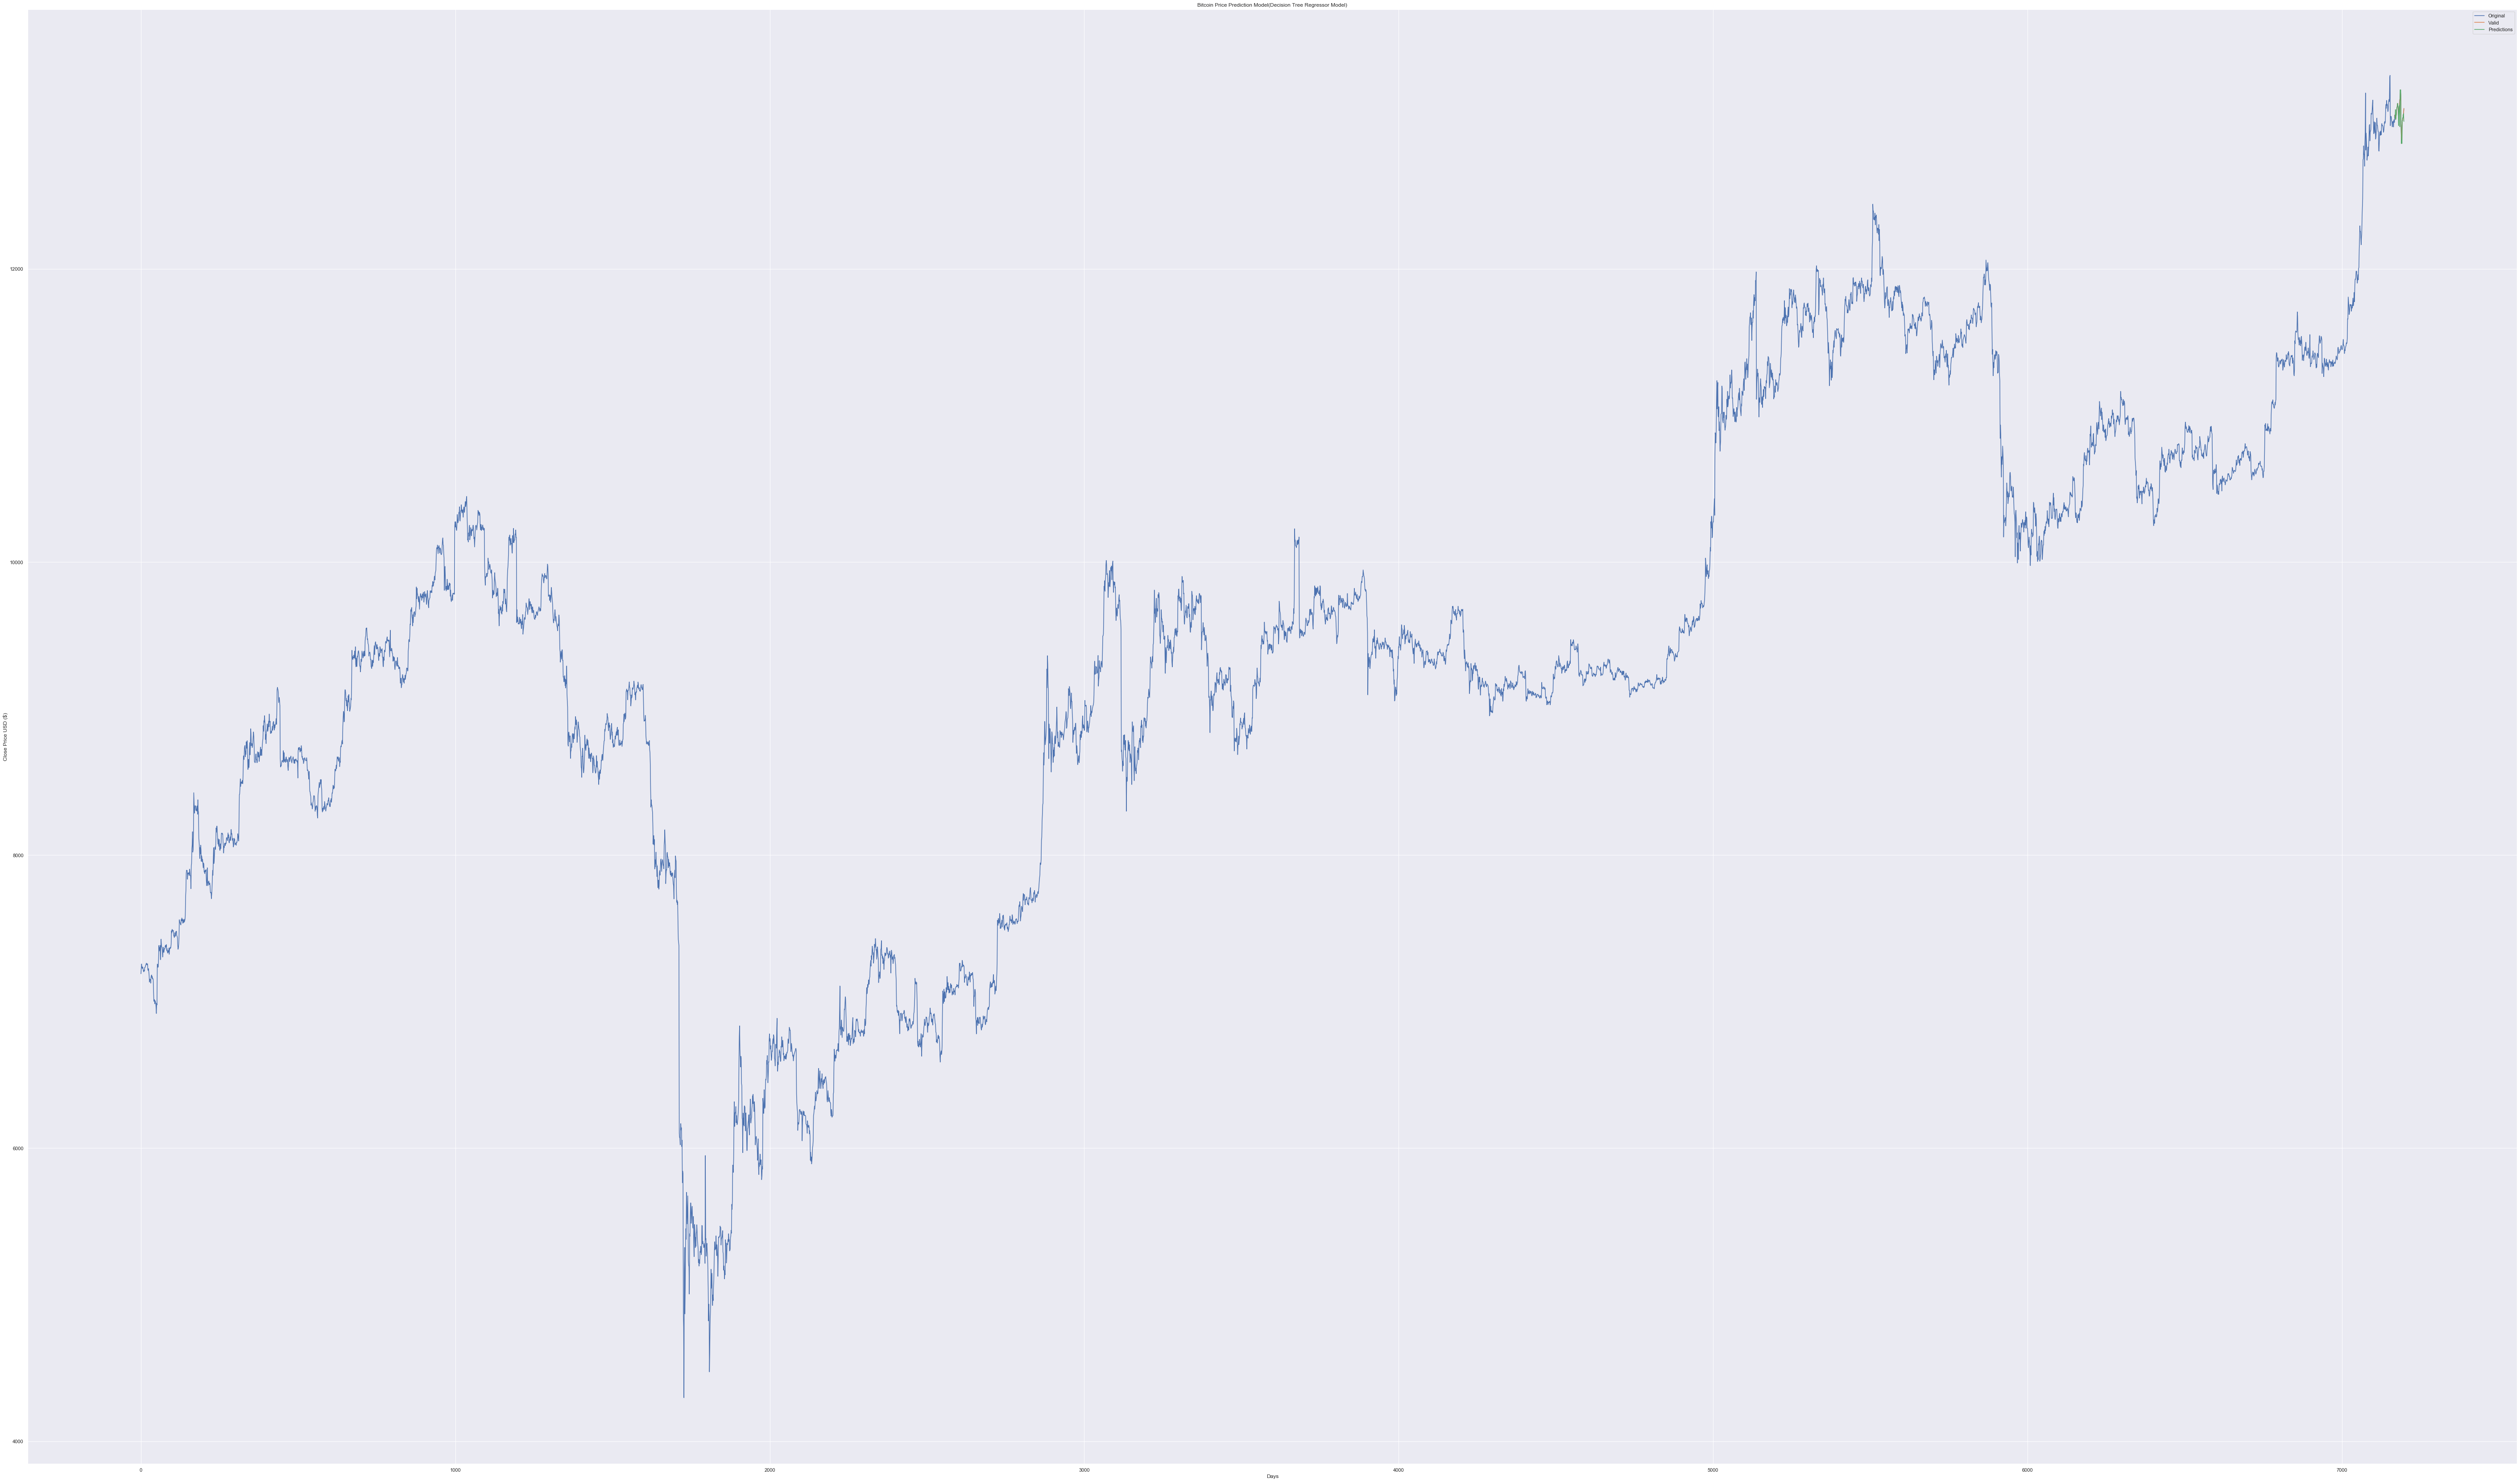

In [12]:
predictions = treePrediction
valid = btccloseprice[x.shape[0]:]
valid["Predictions"] = predictions
plt.figure(figsize=(100, 60))
plt.title("Bitcoin Price Prediction Model(Decision Tree Regressor Model)")
plt.xlabel("Days")
plt.ylabel("Close Price USD ($)")
plt.plot(btccloseprice["CLOSE"])
plt.plot(valid[["CLOSE", "Predictions"]])
plt.legend(["Original", "Valid", "Predictions"])
#plt.show()
plt.savefig("fig1.jpg")


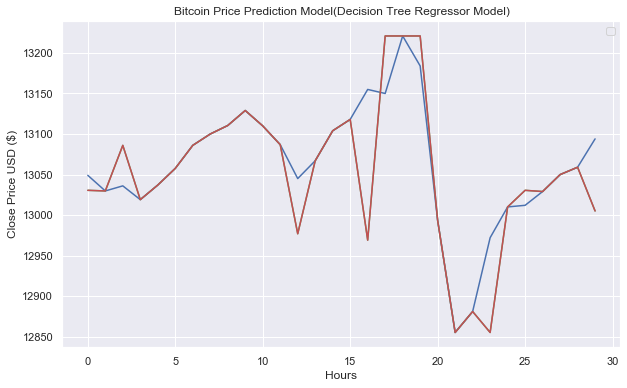

In [25]:
plt.figure(figsize=(10, 6))
plt.title("Bitcoin Price Prediction Model(Decision Tree Regressor Model)")
plt.xlabel("Hours")
plt.ylabel("Close Price USD ($)")
plt.legend(["Predictions","Valid"])
plt.plot(range(len(valid)),valid)
plt.plot(range(len(predictions)),predictions)

